介绍用matplotlib画极线条

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

In [6]:
# 定义参数
figsize = 7
colormap = lambda r: cm.Set2(r/20.)     # 不同的r不同的颜色配置
N = 18     # 极线图中bar的个数

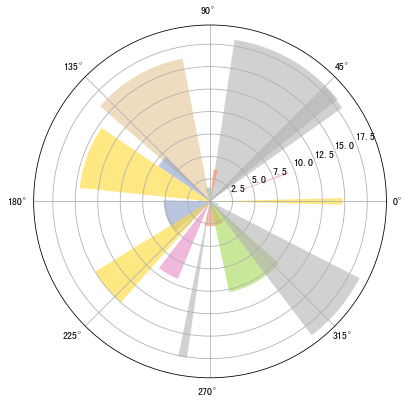

In [8]:
# 做图，其有theta、radii和width三个基本参数
fig = plt.figure(figsize=(figsize, figsize))
ax = fig.add_axes([0.2, 0.2, 0.7, 0.7], polar=True)    # polor要为True

theta = np.arange(0.0, 2*np.pi, 2*np.pi/N)
radii = 20 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
bars = ax.bar(theta, radii, width=width, bottom=0)
# 设定颜色
for r, bar in zip(radii, bars):
    bar.set_facecolor(colormap(r))
    bar.set_alpha(0.6)

plt.show()

#### Case：查找指定文件夹和内部的数据结构，并可视化比例化大小的文件系统树

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import os
import sys

In [12]:
class FolderVisualize(object):

    def __init__(self, start_path):
        self.start_path = start_path
        if not os.path.exists(self.start_path):
            print("ERROR: Path mush exist!")
            sys.exit(-1)
        self.folders = self.build_folders()

    def build_folders(self):
        # 根据起始路径，找到子文件夹和文件名
        dirs = {}
        for dirpath, dirnames, filenames in os.walk(self.start_path):
            dirs = set([os.path.join(dirpath, x) for x in dirnames])
            break    # 只统计指定目录下的第一层文件夹
        folders = []
        for dirname in dirs:
            size = self.get_size(dirname)
            if size:
                folders.append({'size':size, 'path': dirname})

        for each in folders:
            print("Path: " + os.path.basename(each['path']))
            print("Size: " + str(each['size']/1024/1024) + "MB")
        return folders

    @staticmethod
    def get_size(path):
        # 统计文件夹内各文件的尺寸
        assert path is not None
        total_size = 0
        for dirpath, dirnames, filenames in os.walk(path):
            for f in filenames:
                fp = os.path.join(dirpath, f)
                try:
                    size = os.path.getsize(fp)
                    total_size += size
                except OSError as err:
                    print(str(err))
                    pass
        return total_size

    def draw(self):
        # 绘制各文件夹的尺寸
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
        x = [os.path.basename(x['path']) for x in self.folders]
        y = [y['size']/1024/1024 for y in self.folders]
        theta = np.arange(0.0, 2*np.pi, 2 * np.pi / len(x))
        radii = y

        bars = ax.bar(theta, radii)
        middle = 90 / len(x)
        theta_ticks = [t*(180/np.pi) + middle for t in theta]
        lines, labels = plt.thetagrids(theta_ticks, labels=x)
        for step, each in enumerate(labels):
            each.set_rotation(theta[step] * (180 /np.pi) + middle)
            each.set_fontsize(8)

        colormap = lambda r: cm.Set2(r/len(x))
        for r, each in zip(radii, bars):
            each.set_facecolor(colormap(r))
            each.set_alpha(0.5)

        plt.show()

Path: .idea
Size: 0.046929359436035156MB
Path: NumpyDemos
Size: 6.0915021896362305MB
Path: PandasDemos
Size: 0.13463497161865234MB
Path: MatplotDemos
Size: 1.0845842361450195MB
Path: .git
Size: 4.053409576416016MB
Path: BasicTools
Size: 0.04335784912109375MB
Path: DataLoader
Size: 0.0038576126098632812MB


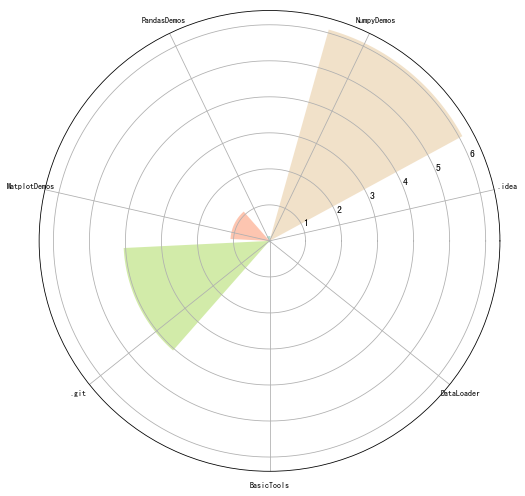

In [14]:
df = FolderVisualize('..')
df.draw()